# PyOD & scikit-learn Anomaly Detection Algorithms 



## 1. KNN

- For an observation, its distance to its kth nearest neighbor could be viewed as the outlying score. It could be viewed as a way to measure the density.

- The unsupervised k-NN method computes the distance of an observation, called Euclidean distance, to other observations. Because an isolated data point has a large distance to other observations, it can be seen as an outlier.

- Three kNN detectors are supported:
    - **largest**: use the distance to the kth neighbor as the outlier score
    - **mean**: use the average of all k neighbors as the outlier score
    - **median**: use the median of the distance to k neighbors as the outlier score

**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

**n_neighbors** (int, optional (default = 5)) – Number of neighbors to use by default for k

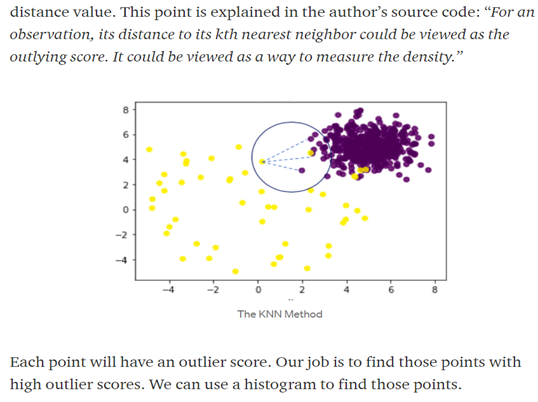

https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn
https://towardsdatascience.com/anomaly-detection-with-pyod-b523fc47db9

**Paper**: . We rank each point on the basis of its distance to its kth nearest neighbor and declare the top n points in this ranking to be outlier. 

- A point p in a data set is an outlier with respect to parameters k and d if no more than k points in the data set are at a distance of d or less from p . The distance function can be any metric distance function.

- The main benefit of the approach in [KN98] is that it does not require any apriori knowledge of data distributions that the statistical methods 

- One is a simple nested-loop algorithm with worst-case complexity O(num_dim*N^2) where num_dim is the number of dimensions and N is the number of points in the dataset

https://webdocs.cs.ualberta.ca/~zaiane/pub/check/ramaswamy.pdf


## 2. Isolation Forest

* It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations

* The IsolationForest 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

* Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

* This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

* The root is randomly selected, and the idea is that outliers should be lying close to the root

* Anomalies are isolated closer to the root of the tree; whereas normal points are isolated at the deeper end of the tree

**n_estimators** (int, optional (default=100)) – The number of base estimators in the ensemble.
**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

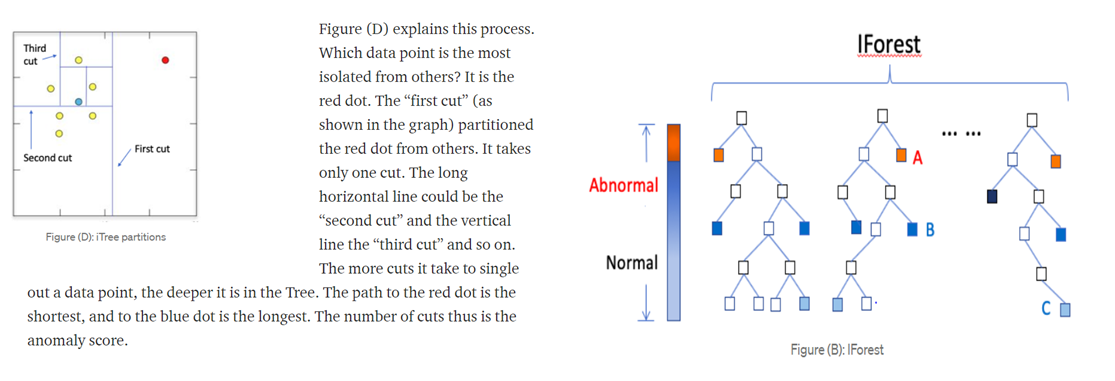


https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest

https://towardsdatascience.com/use-the-isolated-forest-with-pyod-3818eea68f08

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/


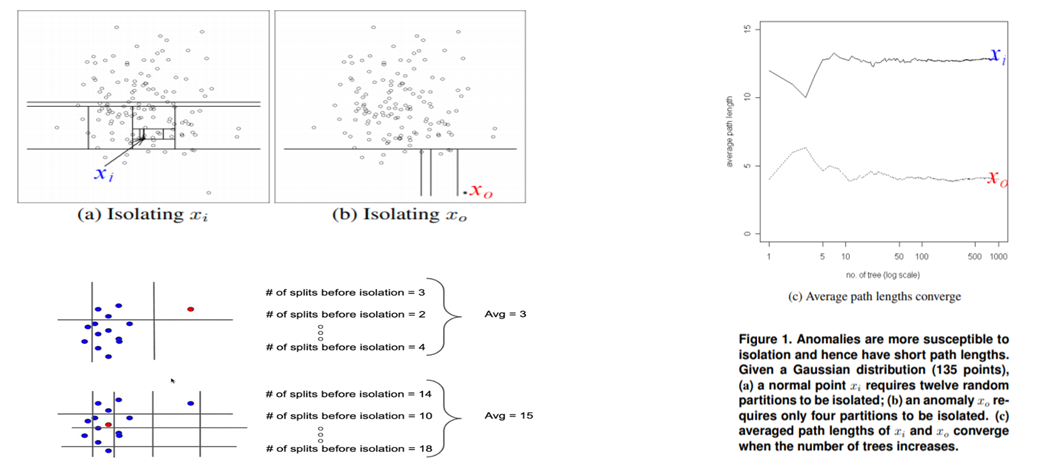

**Paper** : isolation means ‘separating an instance from the rest of the instances’

* iForest utilizes no distance or density measures to detect anomalies. This eliminates major computational cost of distance calculation in all distance-based methods and density-based methods.

* iForest has a linear time complexity with a low constant and a low memory requirement. To our best knowledge, the best-performing existing method achieves only approximate linear time complexity with high memory usage [13].

* iForest has the capacity to scale up to handle extremely large data size and high-dimensional problems with a large number of irrelevant attributes.

* Since each partition is randomly generated, individual trees are generated with different sets of partitions. We average path lengths over a number of trees to find the expected path length.

* Figure 1(c) shows that the average path lengths of xo and xi converge when the number of trees increases. Using 1000 trees, the average path lengths of xo and xi converge to 4.02 and 12.82 respectively. It shows that anomalies are having path lengths shorter than normal instances. 

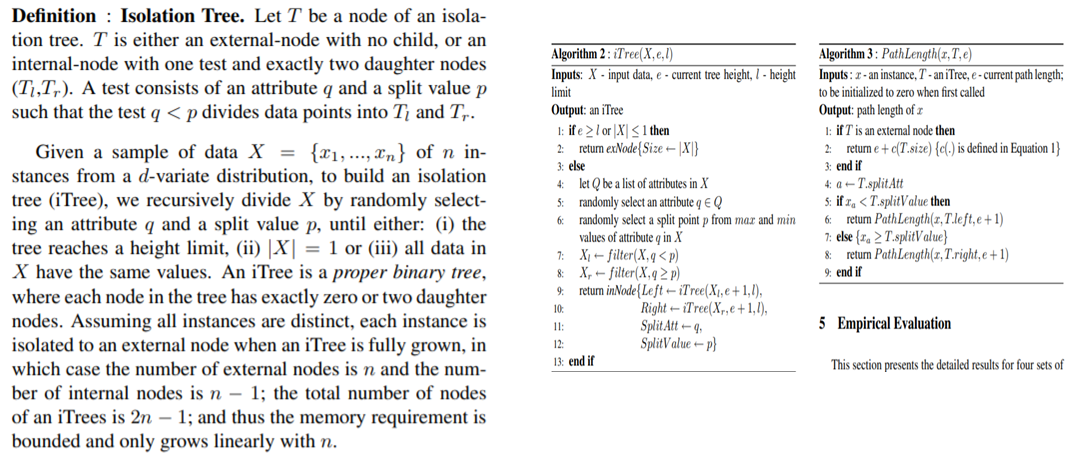

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest


## 3. Local Outleir Factor

* The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. 

* By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

* Local Outlier Factor (LOF) implemented on scikit-learn library.

**n_neighbors** (int, optional (default=20)) – Number of neighbors to use by default for kneighbors queries. If n_neighbors is larger than the number of samples provided, all samples will be used.

**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.lof


**Paper** should be read detailed

* In conclusion, the LOF of a point tells the density of this point compared to the density of its neighbors. If the density of a point is much smaller than the densities of its neighbors (LOF ≫1), the point is far from dense areas and, hence, an outlier.

* Adv: A point will be considered as an outlier if it is at a small distance to the extremely dense cluster. The global approach may not consider that point as an outlier. But the LOF can effectively identify the local outliers

* Dis: Since LOF is a ratio, it is tough to interpret. There is no specific threshold value above which a point is defined as an outlier. The identification of an outlier is dependent on the problem and the user

* Time complexity: O(n2 )

https://www.researchgate.net/publication/221214719_LOF_Identifying_Density-Based_Local_Outliers
https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe#:~:text=Local%20Outlier%20Factor%20(LOF)%20is,point%20is%20an%20outlier%2Fanomaly.&text=The%20LOF%20is%20a%20calculation,of%20other%20points%20later%20on.


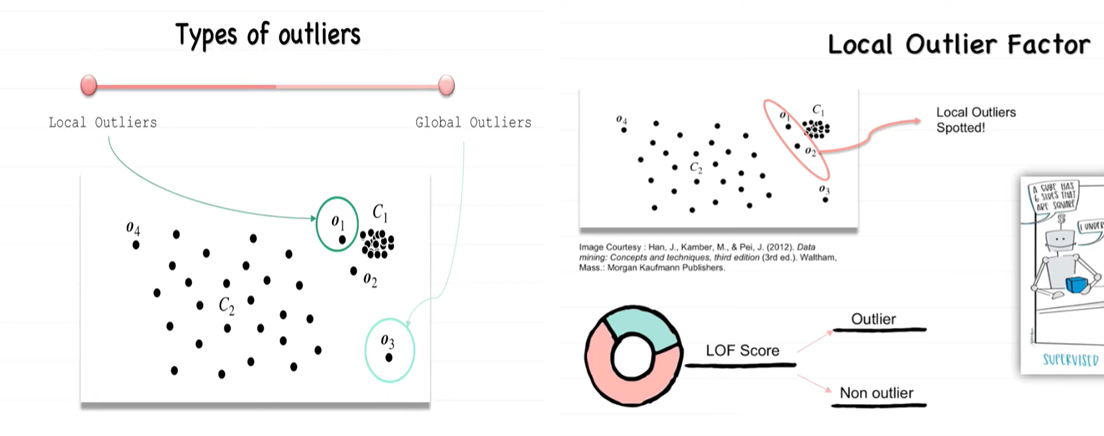

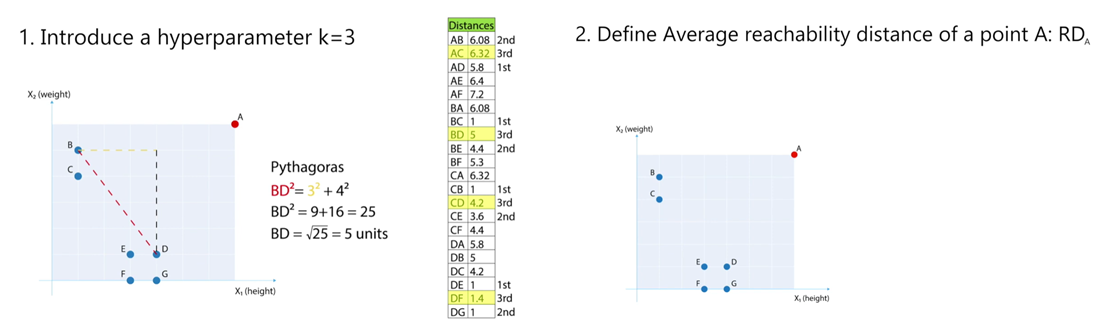

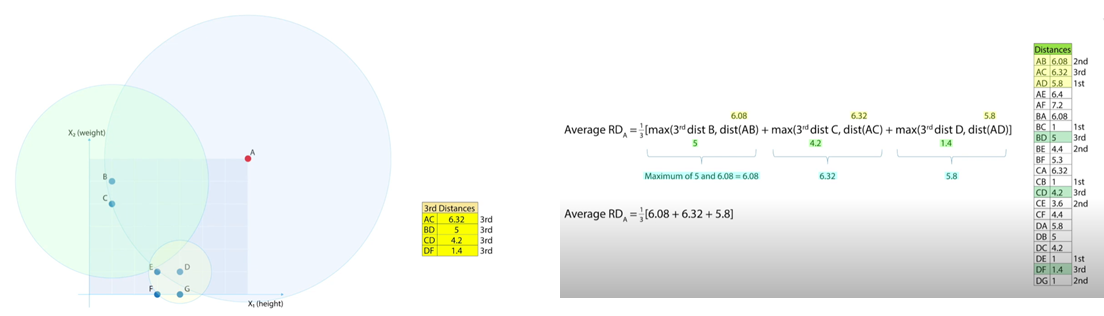

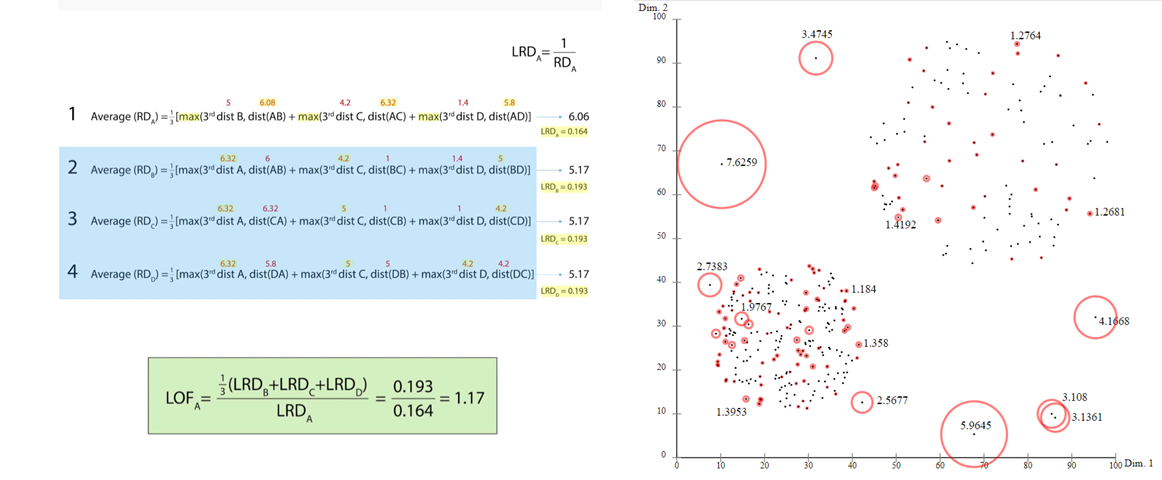

## 4. One Class SVM

* A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data. It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as, you guessed it, outliers. 

**my note**: this is semisupervised learning algorithm actually, not absolute an anomaly detection algorithm

* One-class SVM detector implemented on scikit-learn library.

**kernel** (string, optional (default='rbf')) – Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

**nu** (float, optional) – An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

**gamma** (float, optional (default='auto')) – Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.ocsvm

paper: https://www.researchgate.net/publication/220499623_Estimating_Support_of_a_High-Dimensional_Distribution


## 5. CBLOC

* The CBLOF operator calculates the outlier score based on cluster-based local outlier factor

* CBLOF takes as an input the data set and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta.  The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.

* It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster

**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.


https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof

paper: http://www.dis.uniroma1.it/~sassano/STAGE/Outliers.pdf

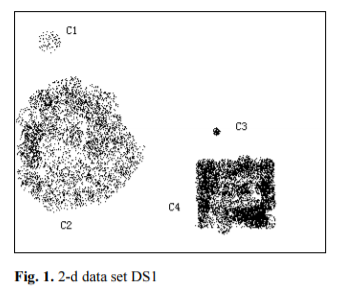

## 6. DBSCAN

* As is the case in most machine learning algorithms, the model’s behaviour is dictated by several parameters. For dbscan, we’ll touch on three. 

    * **eps**: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
    * **min_samples**: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
    * **metric**: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).
    
* The algorithm works by computing the distance between every point and all other points. We then place the points into one of three categories.

**Core point**: A point with at least min_samples points whose distance with respect to the point is below the threshold defined by epsilon.

**Border point**: A point that isn’t in close proximity to at least min_samples points but is close enough to one or more core point. Border points are included in the cluster of the closest core point.

**Noise point**: Points that aren’t close enough to core points to be considered border points. Noise points are ignored. That is to say, they aren’t part of any cluster.

**Epsilon specified with knn**: We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc



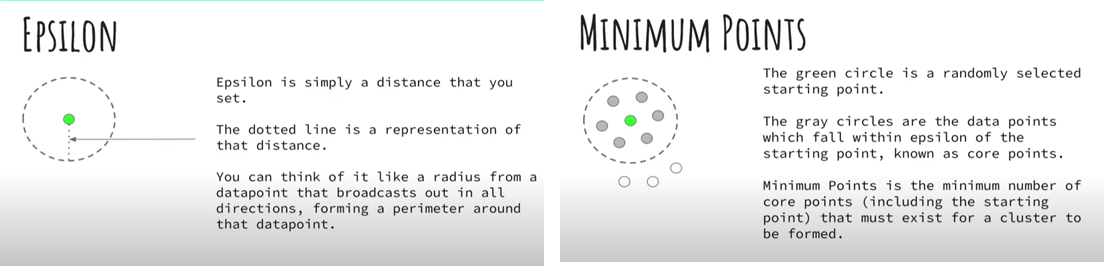

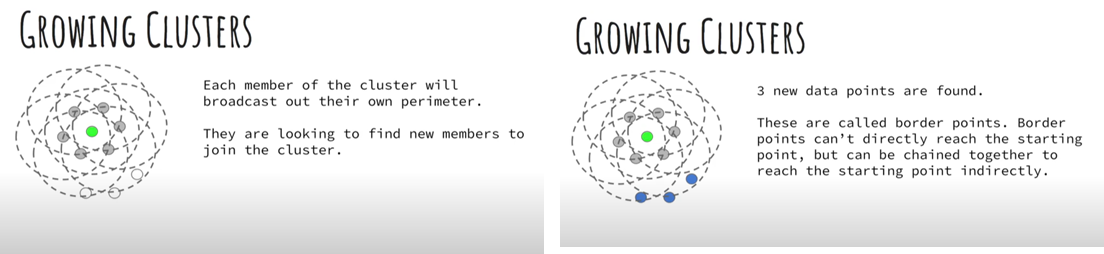

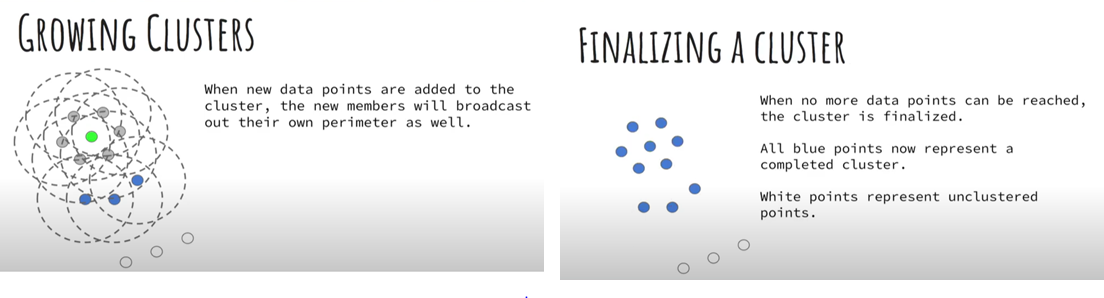

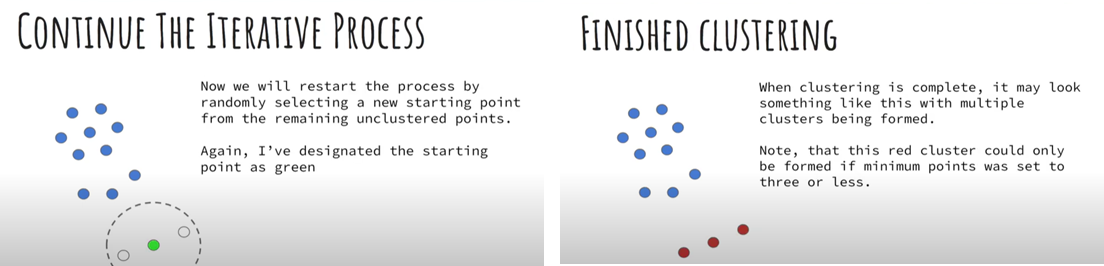

* n overall average runtime complexity of O(nlogn)

* worst case run time complexity remains O(n2).

* O(n2) memory, whereas a non-matrix based implementation of DBSCAN only needs O(n) memory.


https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


## 7. AutoEncoder

* Auto Encoder (AE) is a type of neural networks for learning useful data representations unsupervisedly. Similar to PCA, AE could be used to detect outlying objects in the data by calculating the reconstruction errors. See [BAgg15] Chapter 3 for details.


**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.


https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.auto_encoder

paper: https://www.springer.com/gp/book/9783319475776


## 8. PCA

* Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

* In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

* Therefore, a low dimensional hyperplane constructed by k eigenvectors can capture most of the variance in the data. However, outliers are different from normal data points, which is more obvious on the hyperplane constructed by the eigenvectors with small eigenvalues.

* Therefore, outlier scores can be obtained as the sum of the projected distance of a sample on all eigenvectors. See [BSCSC03,BAgg15] for details.

**Score(X)** = Sum of weighted euclidean distance between each sample to the hyperplane constructed by the selected eigenvectors

**contamination** (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.pca

https://homepages.laas.fr/owe/METROSEC/DOC/FDM03.pdf



## MY NOTES

KNN -> 	
	-> Bir gözlem için, kinci en yakın komşusuna olan uzaklığı, dıştaki puan olarak görülebilir.
	Her sample'ı K_inci en yakın komşusuna olan mesafesine göre sıralıyoruz ve bu sıralamadaki ilk n puanı aykırı olarak ilan ediyoruz.
	- contamination(0.1)	:veri setindeki anormal veri sayısı yüzdesi
	- n_neighbors(5)		:yakınlığı ölçmek için dikkate alınacak komşu sayısı
	- method('largest')		:aykırı puan olarak k'inci komşuya olan mesafeyi kullanın
	- metric('minkowski')	:mesafe hesaplaması için kullanılacak metrik
	- n_jobs(1)				:komşu araması için çalıştırılacak paralel işlerin sayısı

	For an observation, its distance to its kth nearest neighbor could be 
    viewed as the outlying score. It could be viewed as a way to measure
    the density.
	Three kNN detectors are supported:
    largest: use the distance to the kth neighbor as the outlier score
    mean: use the average of all k neighbors as the outlier score
    median: use the median of the distance to k neighbors as the outlier score
	
	Parameters
    ----------
	
	contamination : float in (0., 0.5), optional (default=0.1)
		The amount of contamination of the data set,
		i.e. the proportion of outliers in the data set. Used when fitting to
		define the threshold on the decision function.
		
	n_neighbors - number of neighbors to consider for measuring the proximity
	method : str, optional (default='largest')
        {'largest', 'mean', 'median'}

        - 'largest': use the distance to the kth neighbor as the outlier score
        - 'mean': use the average of all k neighbors as the outlier score
        - 'median': use the median of the distance to k neighbors as the outlier score
		
	metric : string or callable, default 'minkowski'
        metric to use for distance computation. Any metric from scikit-learn
        or scipy.spatial.distance can be used.
		
		Valid values for metric are:

        - from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
          'manhattan']

		
	n_jobs : int, optional (default = 1)
        The number of parallel jobs to run for neighbors search.
        If ``-1``, then the number of jobs is set to the number of CPU cores.
        Affects only kneighbors and kneighbors_graph methods.

-------------------------	
Isolation Forest -> 
	-> Bir noktanın(sample) yapı içinde ne kadar izole olduğuna bakan bir anormallik puanı sağlar. 
	Anormallik puanı daha sonra normal gözlemlerden aykırı değerleri belirlemek için kullanılır.
	Bir özelliği rastgele seçerek ve ardından seçilen özelliğin maksimum ve minimum değerleri arasında rastgele bir bölünmüş değer seçerek gözlemleri 'izole eder'.
	Yinelemeli bölümleme bir ağaç yapısıyla temsil edilebildiğinden, 
	bir örneği izole etmek için gereken bölme sayısı, kök düğümden sonlandırma düğümüne giden yol uzunluğuna eşittir.
	Bu tür rastgele ağaçlardan oluşan bir orman üzerinde ortalaması alınan bu yol uzunluğu, normalliğin ve karar işlevimizin bir ölçüsüdür.
	Anormallikler ağacın köküne daha yakın bir yerde izole edilir; normal noktalar ise ağacın daha derin ucunda izole edilmiştir.

	The IsolationForest 'isolates' observations by randomly selecting a
    feature and then randomly selecting a split value between the maximum and
    minimum values of the selected feature.
    See :cite:`liu2008isolation,liu2012isolation` for details.

    Since recursive partitioning can be represented by a tree structure, the
    number of splittings required to isolate a sample is equivalent to the path
    length from the root node to the terminating node.

    This path length, averaged over a forest of such random trees, is a
    measure of normality and our decision function.

    Random partitioning produces noticeably shorter paths for anomalies.
    Hence, when a forest of random trees collectively produce shorter path
    lengths for particular samples, they are highly likely to be anomalies.
	
	Parameters
    ----------
    n_estimators : int, optional (default=100)
        The number of base estimators in the ensemble.


    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set, i.e. the proportion
        of outliers in the data set. Used when fitting to define the threshold
        on the decision function.

    bootstrap : bool, optional (default=False)
        If True, individual trees are fit on random subsets of the training
        data sampled with replacement. If False, sampling without replacement
        is performed.

    n_jobs : integer, optional (default=1)
        The number of jobs to run in parallel for both `fit` and `predict`.
        If -1, then the number of jobs is set to the number of cores.
-------------------------
Cluster Based LOF (CBLOF):	
	
	-> Verileri küçük kümeler ve büyük kümeler halinde sınıflandırır. 
	Anormallik puanı daha sonra noktanın ait olduğu kümenin büyüklüğüne ve 
	en yakın büyük kümeye olan mesafeye göre hesaplanır.
	
	
    r"""The CBLOF operator calculates the outlier score based on cluster-based
    local outlier factor.

    CBLOF takes as an input the data set and the cluster model that was
    generated by a clustering algorithm. It classifies the clusters into small
    clusters and large clusters using the parameters alpha and beta.
    The anomaly score is then calculated based on the size of the cluster the
    point belongs to as well as the distance to the nearest large cluster.

    Use weighting for outlier factor based on the sizes of the clusters as
    proposed in the original publication. Since this might lead to unexpected
    behavior (outliers close to small clusters are not found), it is disabled
    by default.Outliers scores are solely computed based on their distance to
    the closest large cluster center.

    By default, kMeans is used for clustering algorithm instead of
    Squeezer algorithm mentioned in the original paper for multiple reasons.

    See :cite:`he2003discovering` for details.

    Parameters
    ----------
    n_clusters : int, optional (default=8)
        The number of clusters to form as well as the number of
        centroids to generate.

    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set,
        i.e. the proportion of outliers in the data set. Used when fitting to
        define the threshold on the decision function.

    alpha : float in (0.5, 1), optional (default=0.9)
        Coefficient for deciding small and large clusters. The ratio
        of the number of samples in large clusters to the number of samples in
        small clusters.

    beta : int or float in (1,), optional (default=5).
        Coefficient for deciding small and large clusters. For a list
        sorted clusters by size `|C1|, \|C2|, ..., |Cn|, beta = |Ck|/|Ck-1|`


    n_jobs : integer, optional (default=1)
        The number of jobs to run in parallel for both `fit` and `predict`.
        If -1, then the number of jobs is set to the number of cores.


-------------------------
Local Outlier Factor 
	-> Her örneğin anormallik skoruna Yerel Aykırı Değer Faktörü adı verilir. 
	Komşularına göre belirli bir numunenin yerel yoğunluk sapmasını ölçer. 
	Anomali skorunun, nesnenin çevresindeki mahalleye göre ne kadar izole olduğuna bağlı olması yereldir. 
	Daha kesin olarak, yerellik, uzaklığı yerel yoğunluğu tahmin etmek için kullanılan k-en yakın komşular tarafından verilir.
	Bir noktanın LOF'si, komşularının yoğunluğuna kıyasla bu noktanın yoğunluğunu belirtir. 
	Bir noktanın yoğunluğu komşularının yoğunluklarından (LOF >> 1) çok daha küçükse, nokta yoğun alanlardan uzaktır ve dolayısıyla bir aykırı değerdir.
	Bir numunenin yerel yoğunluğu, komşularının yerel yoğunlukları ile karşılaştırılarak, 
	komşularından önemli ölçüde daha düşük yoğunluğa sahip numuneler belirlenebilir. Bunlar aykırı değerler olarak kabul edilir.
	
	"""Wrapper of scikit-learn LOF Class with more functionalities.
    Unsupervised Outlier Detection using Local Outlier Factor (LOF).

    The anomaly score of each sample is called Local Outlier Factor.
    It measures the local deviation of density of a given sample with
    respect to its neighbors.
    It is local in that the anomaly score depends on how isolated the object
    is with respect to the surrounding neighborhood.
    More precisely, locality is given by k-nearest neighbors, whose distance
    is used to estimate the local density.
    By comparing the local density of a sample to the local densities of
    its neighbors, one can identify samples that have a substantially lower
    density than their neighbors. These are considered outliers.
    See :cite:`breunig2000lof` for details.

    Parameters
    ----------
    n_neighbors : int, optional (default=20)
        Number of neighbors to use by default for `kneighbors` queries.
        If n_neighbors is larger than the number of samples provided,
        all samples will be used.

    metric : string or callable, default 'minkowski'
        metric used for the distance computation. Any metric from scikit-learn
        or scipy.spatial.distance can be used.

        If 'precomputed', the training input X is expected to be a distance
        matrix.

        If metric is a callable function, it is called on each
        pair of instances (rows) and the resulting value recorded. The callable
        should take two arrays as input and return one value indicating the
        distance between them. This works for Scipy's metrics, but is less
        efficient than passing the metric name as a string.

        Valid values for metric are:

        - from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
          'manhattan']

        - from scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',
          'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski',
          'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
          'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
          'sqeuclidean', 'yule']

        See the documentation for scipy.spatial.distance for details on these
        metrics:
        http://docs.scipy.org/doc/scipy/reference/spatial.distance.html

    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set, i.e. the proportion
        of outliers in the data set. When fitting this is used to define the
        threshold on the decision function.

    n_jobs : int, optional (default = 1)
        The number of parallel jobs to run for neighbors search.
        If ``-1``, then the number of jobs is set to the number of CPU cores.
        Affects only kneighbors and kneighbors_graph methods.
	
	
-------------------------	
one-class SVM 
	-> 
	
	"""Wrapper of scikit-learn one-class SVM Class with more functionalities.
    Unsupervised Outlier Detection.

    Estimate the support of a high-dimensional distribution.

    The implementation is based on libsvm.
    See http://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection
    and :cite:`scholkopf2001estimating`.

    Parameters
    ----------
    kernel : string, optional (default='rbf')
         Specifies the kernel type to be used in the algorithm.
         It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
         a callable.
         If none is given, 'rbf' will be used. If a callable is given it is
         used to precompute the kernel matrix.

    nu : float, optional
        An upper bound on the fraction of training
        errors and a lower bound of the fraction of support
        vectors. Should be in the interval (0, 1]. By default 0.5
        will be taken.

    gamma : float, optional (default='auto')
        Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
        If gamma is 'auto' then 1/n_features will be used instead.
		
    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set, i.e.
        the proportion of outliers in the data set. Used when fitting to
        define the threshold on the decision function.